In [ ]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
# Loading the dataset
data_path = '/content/Spotify_data.csv'
spotify_data = pd.read_csv(data_path)

# Displaying the first few rows of the dataset
spotify_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [ ]:
print(spotify_data.isnull().sum())

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64


       danceability      energy         key    loudness        mode  \
count    195.000000  195.000000  195.000000  195.000000  195.000000   
mean       0.636656    0.638431    5.497436   -9.481631    0.538462   
std        0.216614    0.260096    3.415209    6.525086    0.499802   
min        0.130000    0.002400    0.000000  -42.261000    0.000000   
25%        0.462500    0.533500    2.000000   -9.962000    0.000000   
50%        0.705000    0.659000    6.000000   -7.766000    1.000000   
75%        0.799000    0.837500    8.000000   -5.829000    1.000000   
max        0.946000    0.996000   11.000000   -2.336000    1.000000   

       speechiness  acousticness  instrumentalness    liveness     valence  \
count   195.000000    195.000000        195.000000  195.000000  195.000000   
mean      0.148957      0.319093          0.192337    0.148455    0.493632   
std       0.120414      0.320782          0.346226    0.105975    0.267695   
min       0.027800      0.000003          0.0000

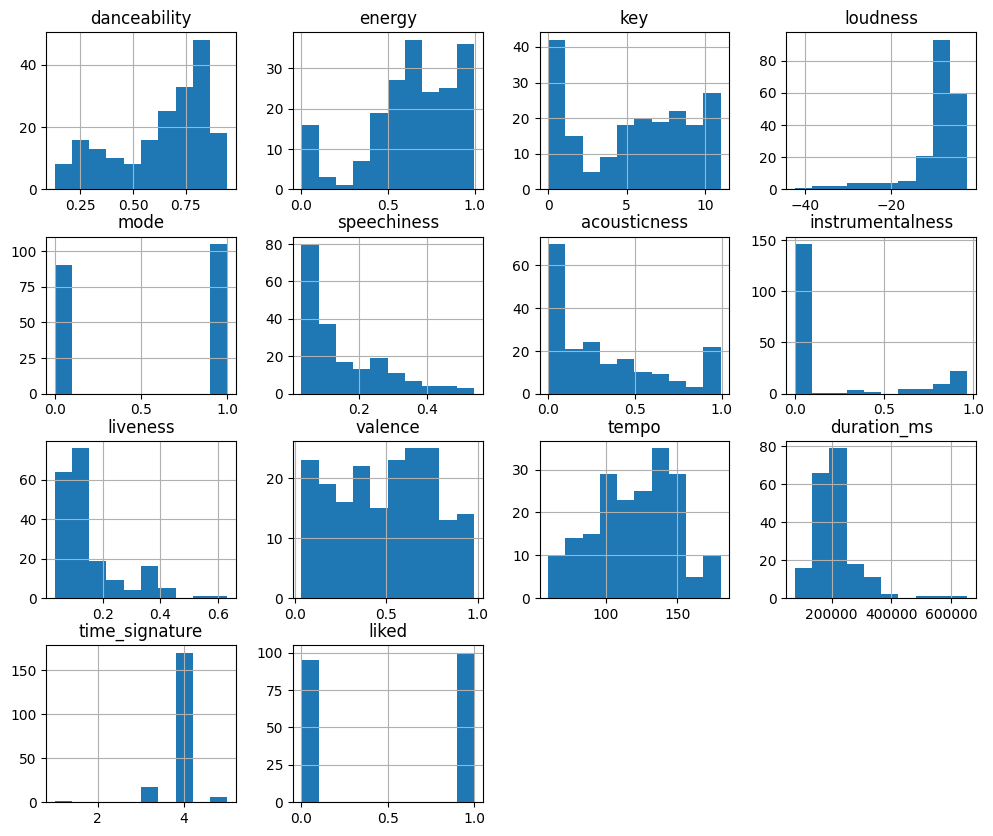

In [ ]:
# Summary statistics
print(spotify_data.describe())

# Plotting distributions of features
spotify_data.hist(figsize=(12, 10))
plt.show()

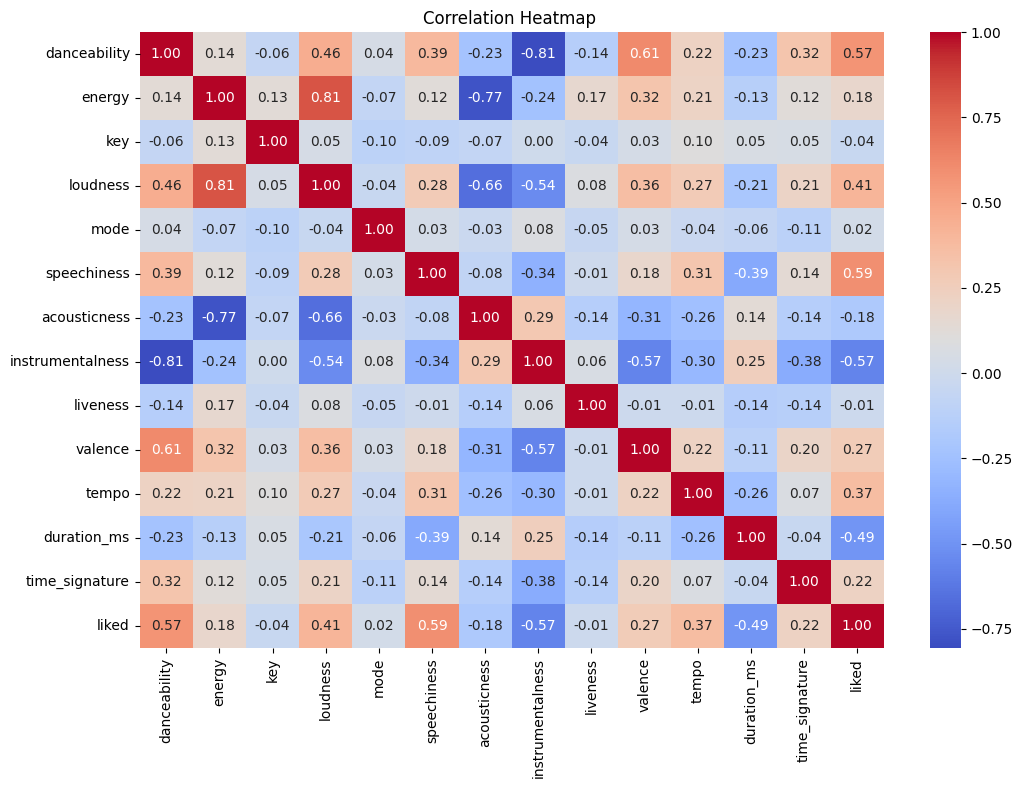

In [ ]:
# Correlation matrix

corr_matrix = spotify_data.corr()


# Plotting the correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap ')
plt.show()



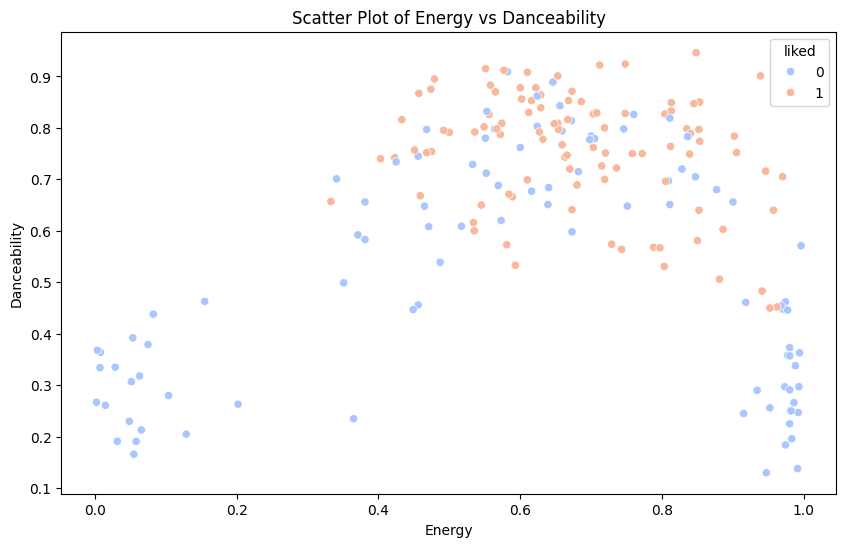

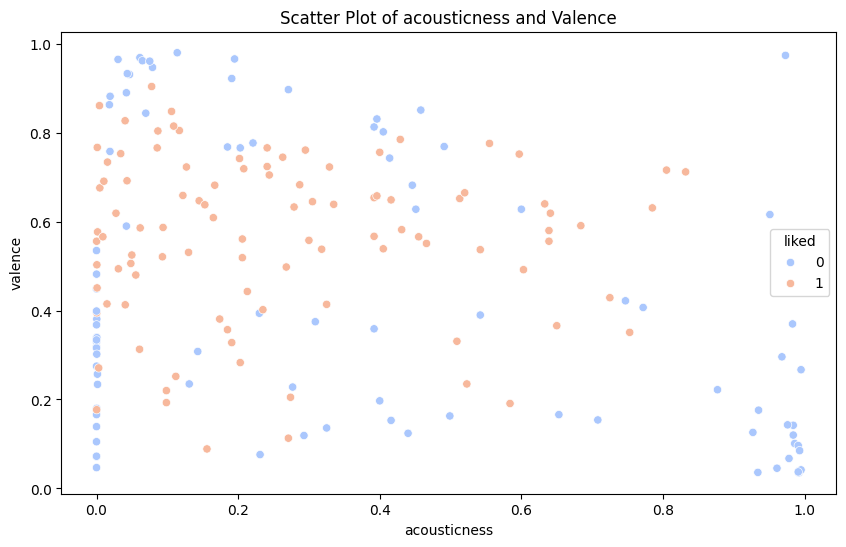

In [ ]:
# Scatter plot of energy vs danceability

plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='danceability', hue='liked', data=spotify_data, palette='coolwarm')

plt.title('Scatter Plot of Energy vs Danceability')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

# Scatter plot of acousticness vs valence

plt.figure(figsize=(10, 6))
sns.scatterplot(x='acousticness', y='valence', hue='liked', data=spotify_data, palette='coolwarm')

plt.title('Scatter Plot of acousticness and Valence')
plt.xlabel('acousticness')
plt.ylabel('valence')
plt.show()


In [ ]:
#Logistic regression model

# Splitting the data into training and testing sets

X = spotify_data.drop(columns=['liked']).values
y = spotify_data['liked'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the features using z-score normalization

scaler = StandardScaler()

X_tr_sc = scaler.fit_transform(X_train)
X_te_sc = scaler.transform(X_test)

#Adding intercept to the standardized features

interc_train = np.ones((X_tr_sc.shape[0], 1))
interc_test = np.ones((X_te_sc.shape[0], 1))

X_train_scaled = np.hstack((interc_train, X_tr_sc))
X_test_scaled = np.hstack((interc_test, X_te_sc))

#defining the sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


#Training logistic regression model (using numpy)
def train_logreg(X, y, weights, learning_rate=0.01, iterations=1000):
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, predictions - y) / len(y)
        weights -= learning_rate * gradient
    return weights

# Intializing weights
weights = np.zeros(X_tr_sc.shape[1])

# Training the model
tr_weights = train_logreg(X_tr_sc, y_train, weights) # Training logistic regression model and weights are stored in 'tr_weights'

#Predicting on the test set
y_pred_prob = sigmoid(np.dot(X_te_sc, tr_weights))
y_pred = (y_pred_prob >= 0.5).astype(int)

#Calculating accuracy, F1 score, and recall
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the model : {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy of the model : 0.8974
F1 Score: 0.9000
Recall: 0.9000


The dataset is initially divided into training and testing groupings. The features are standardised using z-score normalisation to ensure that they have a mean of 0 and a standard deviation of 1 after dividing. This is essential for the efficient convergence of gradient-based algorithms such as logistic regression. The standardised features are supplemented with an intercept term by appending a column of ones.
Then the model is trained using gradient descent, which involves iteratively revising weights based on the error between predictions and actual values.
The sigmoid function is utilised to transform the linear outputs of the model into probabilities, which are then thresholded to produce binary predictions (liked or unliked). Finally, the model's performance is evaluated by computing the accuracy on the test set, and the distribution of predicted classes is presented.


No. of coefficients: 13
No. of features: 13


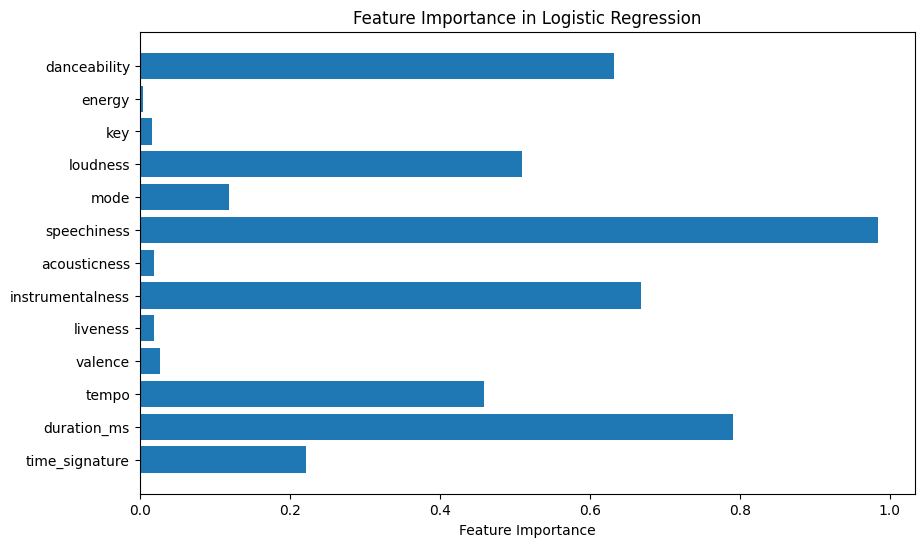

In [ ]:
#number of coefficients and features
num_coeff = len(tr_weights)
num_features = len(feature_names)

print(f"No. of coefficients: {num_coeff}")
print(f"No. of features: {num_features}")

# exclude the intercept
if num_coeff == num_features + 1:  # If intercept is included
    print("intercept is included")


    feature_important = tr_weights[1:]
if num_coeff < num_features:
    print("Some features might have been dropped.")
else:
    feature_important = tr_weights

# plotting the feature importance
if len(feature_important) == len(feature_names):
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, np.abs(feature_important) )
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance in Logistic Regression")
    plt.gca().invert_yaxis()
    plt.show()
else:

    print("Mismatch between no. of features and coefficients.")

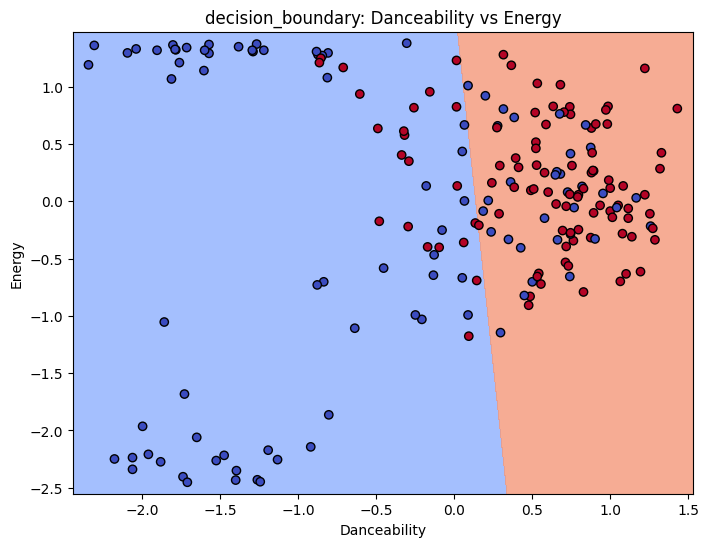

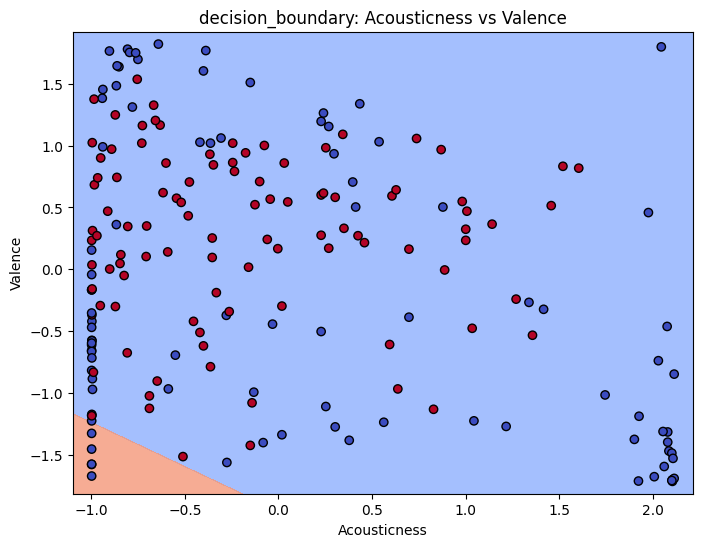

In [ ]:
# Defining a function to plot the decision boundary for logistic regression
def decision_boundary(X, y, weights, f1_idx, f2_idx, f1_name, f2_name):


    # Creating a mesh grid for plotting
    x_min, x_max = X[:, f1_idx].min() - 0.1, X[:, f1_idx].max() + 0.1

    y_min, y_max = X[:, f2_idx].min() - 0.1, X[:, f2_idx].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))


    # Preparing the grid points for prediction
    grid = np.c_[xx.ravel(), yy.ravel()]

    grid = np.hstack((np.ones((grid.shape[0], 1)), grid))  # Adding intercept column

    # Predicting on the grid points
    Z = sigmoid(np.dot(grid, weights[[0, f1_idx + 1, f2_idx + 1]]))

    Z = Z.reshape(xx.shape)

    # Plotting the decision boundary

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.8)
    plt.scatter(X[:, f1_idx], X[:, f2_idx], c=y, edgecolors='k', cmap="coolwarm")
    plt.xlabel(f1_name)

    plt.ylabel(f2_name)
    plt.title(f"decision_boundary: {f1_name} vs {f2_name}")
    plt.show()

# Standardizing the featurs again for the two chosen pairs of features,

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

weights_full = np.zeros(X_scaled.shape[1] + 1)

Xscaled_w_intercept = np.hstack((np.ones((X_scaled.shape[0], 1)), X_scaled))
tr_weights_full = train_logreg(Xscaled_w_intercept, y, weights_full)

# Plottig decision boundaries for two pairs of features
decision_boundary(X_scaled, y, tr_weights_full, f1_idx=0, f2_idx=1, f1_name='Danceability', f2_name='Energy')

decision_boundary(X_scaled, y, tr_weights_full, f1_idx=6, f2_idx=9, f1_name='Acousticness', f2_name='Valence')


In [ ]:
# logistic regression model using sklearn

# Training logistic regression using sklearn
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predicting on the test set
y_sk = logreg.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_sk)
print(f"Accuracy: {accuracy:.4f}")

# Calculating precision, recall, and F1-score for the logistic regression model
precision_sk = precision_score(y_test, y_sk)
recall_sk = recall_score(y_test, y_sk)
f1_sk = f1_score(y_test, y_sk)

# Calculating confusion matrix
conf_matrix = confusion_matrix(y_test, y_sk)

precision_sk, recall_sk, f1_sk, conf_matrix


Accuracy: 0.9231


(0.9047619047619048,
 0.95,
 0.9268292682926829,
 array([[17,  2],
        [ 1, 19]]))

The code utilises Scikit-learn to train and assess a logistic regression model. The process starts by initialising the LogisticRegression model with a maximum of 1000 iterations to guarantee convergence throughout training. The model is trained using standardised training data, which facilitates gradient descent optimisation. Following the completion of the training process, predictions are generated using the test set. In order to assess the effectiveness of the model, important metrics such as precision, recall, and F1-score are computed.
Precision quantifies the accuracy of projected positive labels (loved songs), whereas recall assesses the model's ability to accurately identify actual positive labels.
The F1-score achieves a balance between precision and recall. The code additionally produces a confusion matrix that succinctly presents the number of true positives, true negatives, false positives, and false negatives.
The results demonstrate a robust performance of the model, achieving an accuracy rate of around 90.47%, a recall rate of 95%, and an F1-score of 92.68%. These figures indicate that the model efficiently maintains a balance between precision and recall.

In [ ]:

# Splitting the data

X = spotify_data.drop(columns=['liked']).values
y = spotify_data['liked'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Function to train and evaluate logistic regression using specified features
def tr_and_eval_logreg(X_train, X_test, y_train, y_test, feature_indices):

    # Specified features for training and testing
    X_train_sel = X_train[:, feature_indices]
    X_test_sel = X_test[:, feature_indices]

    # Training logistic regression model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_sel, y_train)

    # Predicting on the test set
    y_pred = logreg.predict(X_test_sel)

    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculating precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1


In [ ]:
# Danceability and Energy
danceability_energy_indices = [0, 1]
accuracy_de, precision_de, recall_de, f1_de = tr_and_eval_logreg(X_train_scaled, X_test_scaled, y_train, y_test, danceability_energy_indices)

# Acousticness and Valence
acousticness_valence_indices = [6, 9]
accuracy_av, precision_av, recall_av, f1_av = tr_and_eval_logreg(X_train_scaled, X_test_scaled, y_train, y_test, acousticness_valence_indices)

# results
print("Danceability & Energy:")
print(f"Accuracy: {accuracy_de}, Precision: {precision_de}, Recall: {recall_de}, F1 Score: {f1_de}")

print("\nAcousticness & Valence:")
print(f"Accuracy: {accuracy_av}, Precision: {precision_av}, Recall: {recall_av}, F1 Score: {f1_av}")

Danceability & Energy:
Accuracy: 0.7948717948717948, Precision: 0.7307692307692307, Recall: 0.95, F1 Score: 0.8260869565217392

Acousticness & Valence:
Accuracy: 0.5897435897435898, Precision: 0.5833333333333334, Recall: 0.7, F1 Score: 0.6363636363636365


The process of training and evaluating a logistic regression model using two distinct pairs of features from the Spotify dataset. It starts with dividing the dataset into training and testing sets. Then, the features are standardised using StandardScaler to normalise the data. A function called **tr_and_eval_logreg** is defined to handle the training and evaluation of models using specific features. This function chooses the desired feature indices from the training and testing data, trains a logistic regression model using Scikit-learn, and assesses the model's performance on the test set by measuring accuracy, precision, recall, and F1-score.

For model evaluation, I have chosen two pairs of features. The first pair comprises "Danceability" and "Energy," while the second pair includes "Acousticness" and "Valence." The logistic regression model is trained for each feature pair, and the evaluation metrics are printed to facilitate a comparison of model performance between the two feature sets.

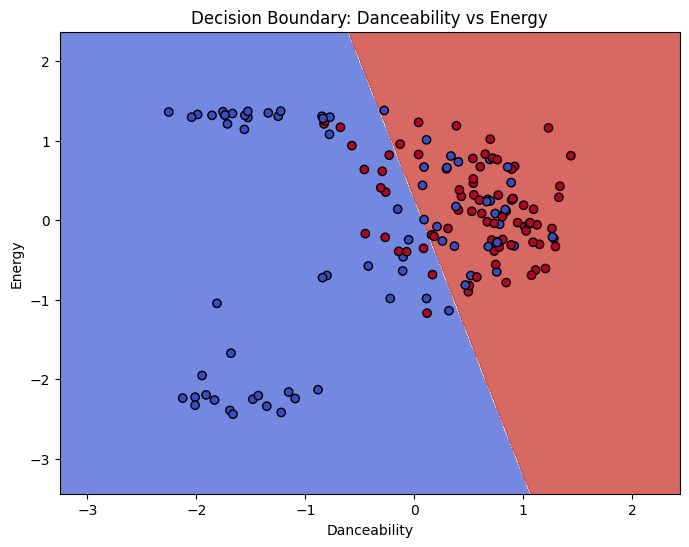

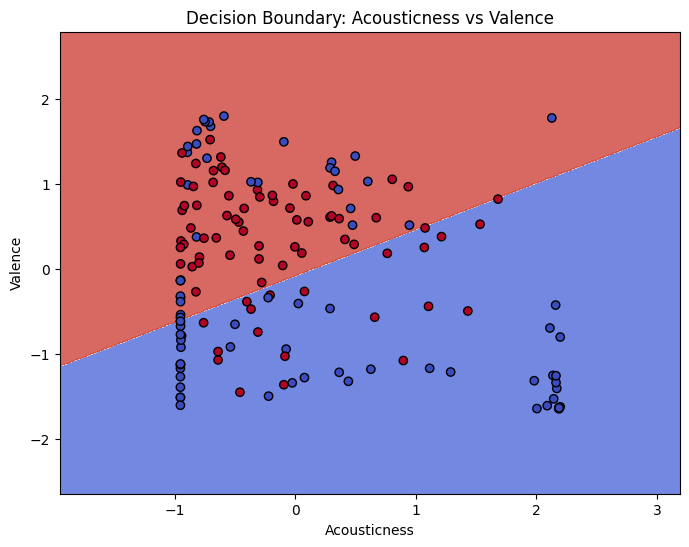

In [ ]:
# Function to train logistic regression and visualize decision boundaries
def p_dec_boundary(X_train, X_test, y_train, y_test, feature_indices, feature_names):

    # Specified features for training and testing
    X_train_sel = X_train[:, feature_indices]
    X_test_sel = X_test[:, feature_indices]

    # Training logistic regression model
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train_sel, y_train)

    # Creating a mesh grid
    x_min, x_max = X_train_sel[:, 0].min() - 1, X_train_sel[:, 0].max() + 1
    y_min, y_max = X_train_sel[:, 1].min() - 1, X_train_sel[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predicting the decision boundary
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
    plt.scatter(X_train_sel[:, 0], X_train_sel[:, 1], c=y_train, edgecolors='k', cmap="coolwarm")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'Decision Boundary: {feature_names[0]} vs {feature_names[1]}')
    plt.show()

# Danceability (index 0) and Energy (index 1)
p_dec_boundary(X_train_scaled, X_test_scaled, y_train, y_test, [0, 1], ['Danceability', 'Energy'])

# Acousticness (index 6) and Valence (index 9)
p_dec_boundary(X_train_scaled, X_test_scaled, y_train, y_test, [6, 9], ['Acousticness', 'Valence'])

In [ ]:

# Function for the Euclidean distance between two points
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# KNN function to predict the class
def knn_predict(X_train, y_train, test_pt, k=5):

    # Calculating the distance from the test point to all training points
    distances = [euclidean_distance(test_pt, x) for x in X_train]

    # indices of the k closest neighbors
    k_indices = np.argsort(distances)[:k]

    # labels of the k closest neighbors
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Performing a majority vote
    most_comm = Counter(k_nearest_labels).most_common(1)

    return most_comm[0][0]

# Function to make predictions for the entire test set using KNN

def knn_predict_t(X_train, y_train, X_test, k=5):

    predictions = [knn_predict(X_train, y_train, test_pt, k) for test_pt in X_test]
    return np.array(predictions)

# Using KNN to make predictions on the test set
k = 5
y_knn = knn_predict_t(X_train_scaled[:, 1:], y_train, X_test_scaled[:, 1:], k)

# accuracy, recall, and F1-score for the KNN

knn_acc = accuracy_score(y_test, y_knn)

knn_rec = recall_score(y_test, y_knn)
knn_f1 = f1_score(y_test, y_knn)


# Print results

print(f"Accuracy: {knn_acc:.4f}")

print(f"Recall: {knn_rec:.4f}")

print(f"F1 Score: {knn_f1:.4f}")

Accuracy: 0.8462
Recall: 0.8500
F1 Score: 0.8500


In [ ]:

# Function to calculate and return metrics

def metrics(y_true, y_pred, model_name):

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, precision, recall, f1, model_name

m_manual = metrics(y_test, y_pred, "Logistic Regression")

m_sklearn = metrics(y_test, y_sk, "Logistic Regression using Scikit")

m_knn = metrics(y_test, y_knn, "K-Nearest Neighbors (KNN)")

# Function for comparison

def disp_comp(*metrics):

    for metric in metrics:

        accuracy, precision, recall, f1, model_name = metric
        print(f"\nMetrics for {model_name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print("-" * 30)

# comparison
disp_comp(m_manual, m_sklearn, m_knn)



Metrics for Logistic Regression:
Accuracy: 0.8974
Precision: 0.9000
Recall: 0.9000
F1 Score: 0.9000
------------------------------

Metrics for Logistic Regression using Scikit:
Accuracy: 0.9231
Precision: 0.9048
Recall: 0.9500
F1 Score: 0.9268
------------------------------

Metrics for K-Nearest Neighbors (KNN):
Accuracy: 0.8462
Precision: 0.8500
Recall: 0.8500
F1 Score: 0.8500
------------------------------


The performance of two machine learning models, Logistic Regression and K-Nearest Neighbours (KNN).
This code evaluates the model using various metrics to assess its performance. An evaluation of the KNN model is conducted in a similar manner. Ultimately, a comparison is made betwen the F1-scores of both models to determine their relative performance. The evaluation function compiles important metrics to comprehensively assess the performance of each model and presents the results for convenient comparison.